In [121]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [122]:
from datetime import datetime
import pandas_datareader.data as wb

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)
symbols = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
datos= pd.DataFrame()

In [123]:
for stock in symbols:
    globals()[stock]=wb.DataReader(stock,'yahoo',start,end)

In [124]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,153.895675,150.729246,152.218254,152.396270,8.653354e+07,152.055638
std,16.454133,15.714579,16.110196,16.118022,2.553224e+07,16.300203
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.251930
25%,144.067505,141.277500,142.420002,142.599995,6.897910e+07,142.157860
50%,150.849998,148.550003,149.570000,149.584999,8.070365e+07,149.176941
75%,169.605000,164.942501,167.374996,166.229996,9.883062e+07,166.071358
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


In [125]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-04-19 to 2022-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


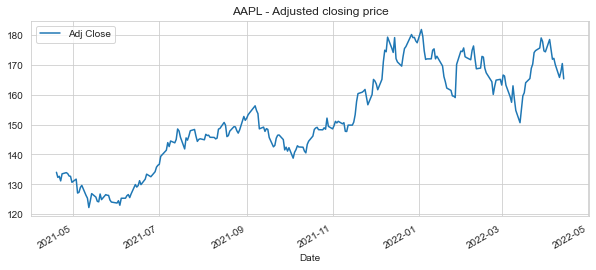

In [126]:
AAPL_adj_close = AAPL['Adj Close'].plot(legend=True,figsize=(10,4),title="AAPL - Adjusted closing price")

<AxesSubplot:xlabel='Date'>

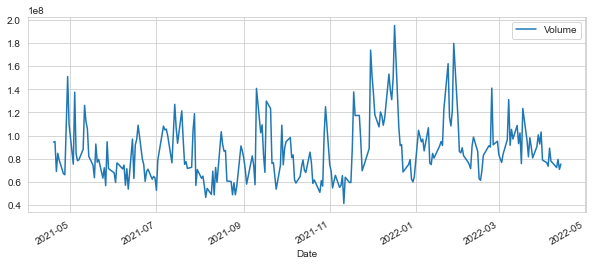

In [127]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [128]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

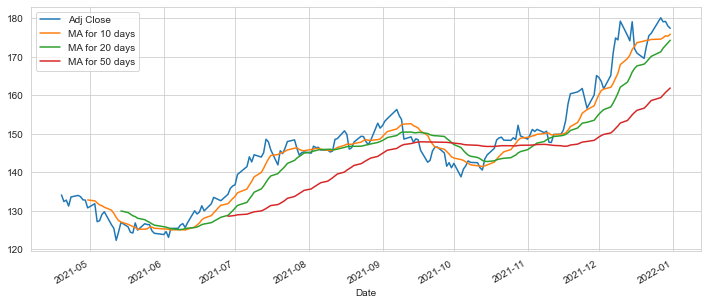

In [129]:
AAPL.truncate(before='2021-01-01', after='2022-01-01')[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

In [130]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

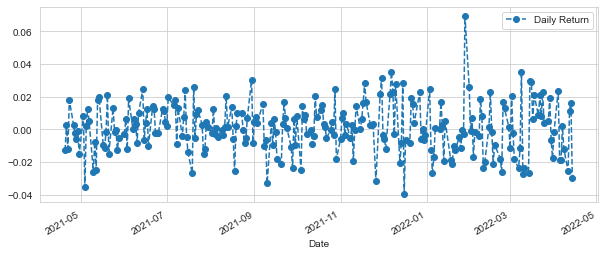

In [131]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

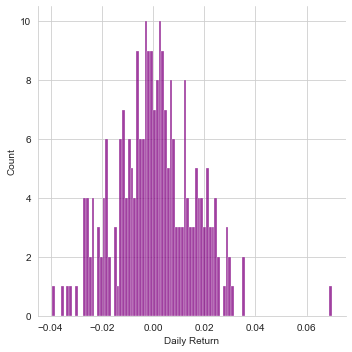

In [132]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

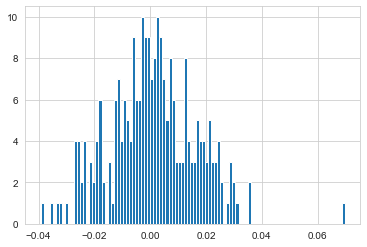

In [133]:
AAPL['Daily Return'].hist(bins=100)

In [134]:
closing_df=wb.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [135]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-19,134.043304,2302.399902,256.649475,3372.010010
2021-04-20,132.323532,2293.629883,256.173370,3334.689941
2021-04-21,132.711243,2293.290039,258.474609,3362.020020
2021-04-22,131.160446,2267.919922,255.092163,3309.040039
2021-04-23,133.526382,2315.300049,259.040039,3340.879883


In [136]:
tech_rets=closing_df.pct_change()

In [137]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-19,NaN,NaN,NaN,NaN
2021-04-20,-0.012830,-0.003809,-0.001855,-0.011068
2021-04-21,0.002930,-0.000148,0.008983,0.008196
2021-04-22,-0.011685,-0.011063,-0.013086,-0.015758
2021-04-23,0.018038,0.020891,0.015476,0.009622


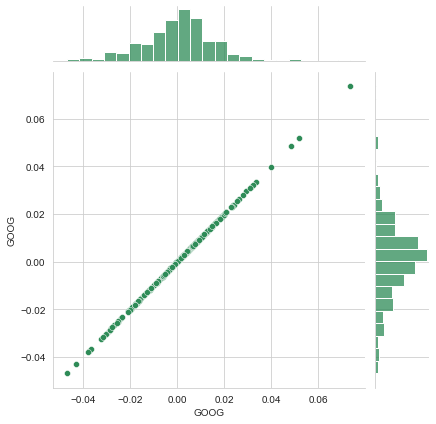

In [138]:
sns.jointplot(x="GOOG",y="GOOG",data=tech_rets,kind='scatter',color='seagreen')

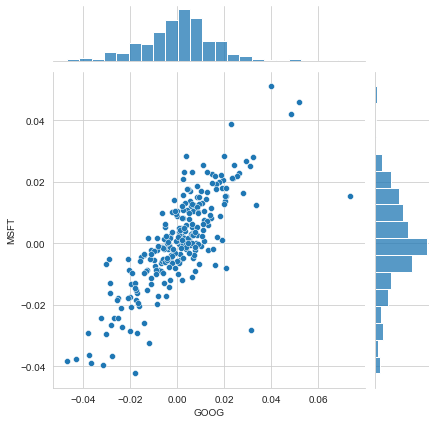

In [139]:
sns.jointplot(x="GOOG",y="MSFT",data=tech_rets,kind='scatter')

In [140]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-19,NaN,NaN,NaN,NaN
2021-04-20,-0.012830,-0.003809,-0.001855,-0.011068
2021-04-21,0.002930,-0.000148,0.008983,0.008196
2021-04-22,-0.011685,-0.011063,-0.013086,-0.015758
2021-04-23,0.018038,0.020891,0.015476,0.009622


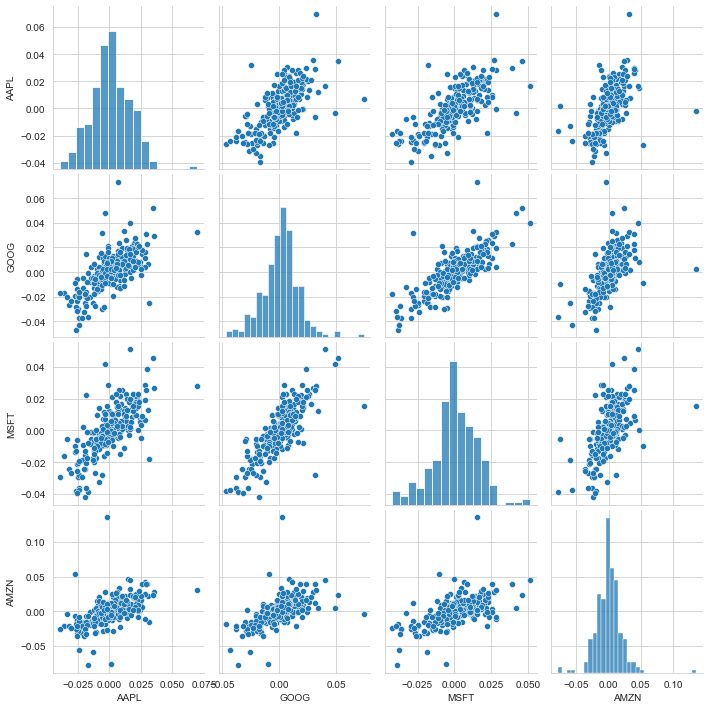

In [141]:
sns.pairplot(tech_rets.dropna())

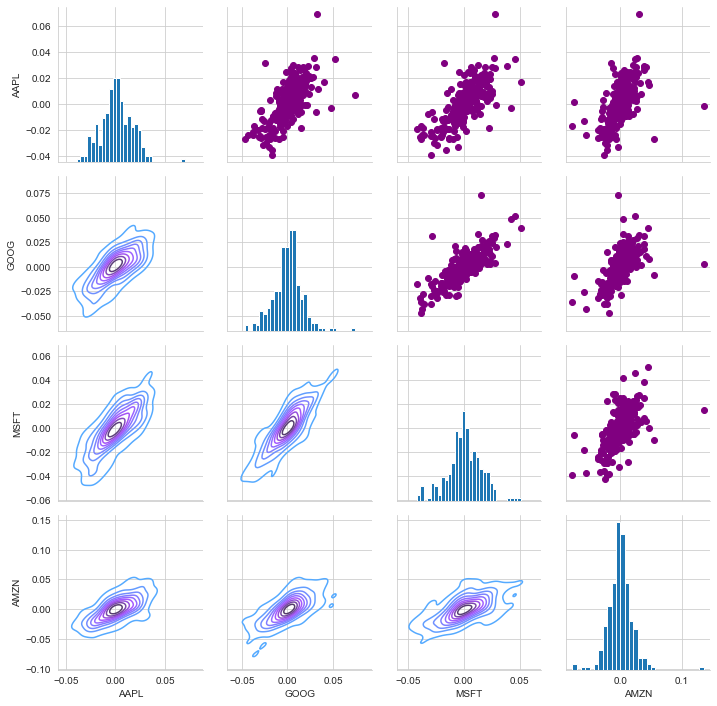

In [142]:
returns_fig=sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

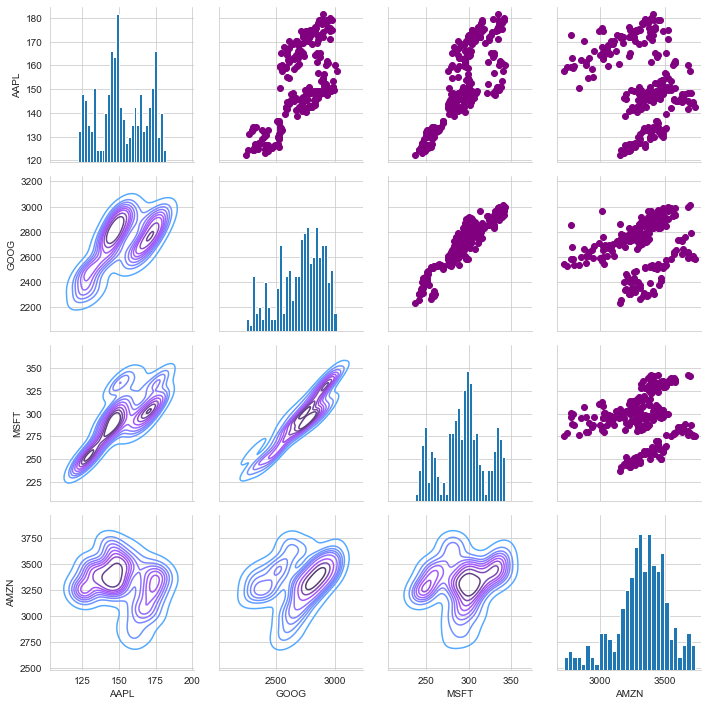

In [143]:
returns_fig=sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

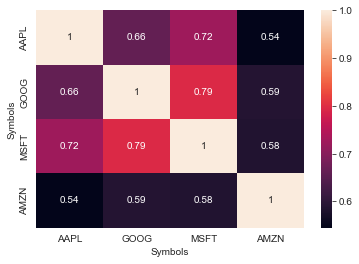

In [144]:
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr,annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

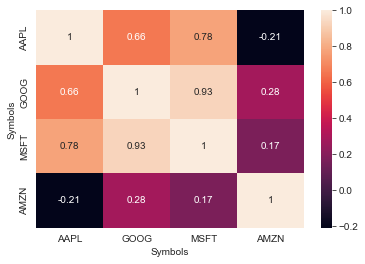

In [157]:
tech_rets_corr=closing_df.corr()
sns.heatmap(tech_rets_corr,annot=True)

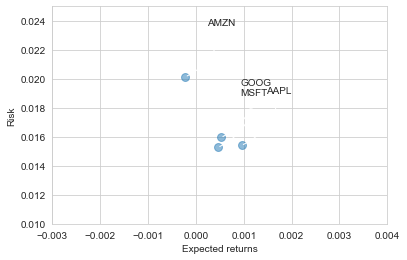

In [165]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

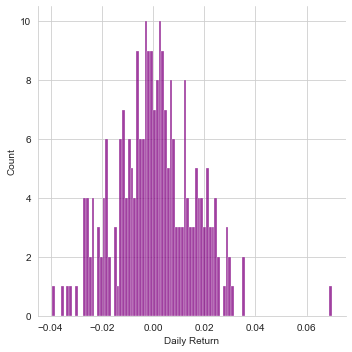

In [167]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [168]:
rets['AAPL'].quantile(0.05)

-0.025219802189300145

In [169]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [174]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

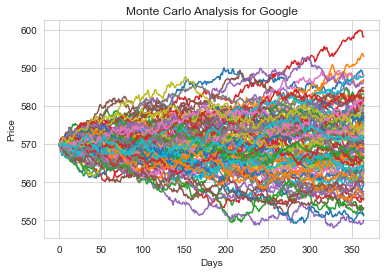

In [175]:
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [176]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

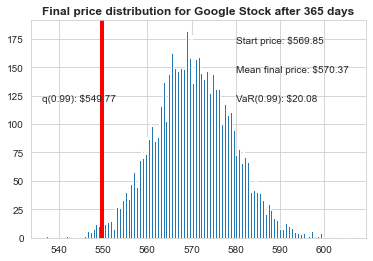

In [177]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')
            
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');